<a href="https://colab.research.google.com/github/kkharon/iS/blob/main/Task_5_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Вариант 5

https://archive.ics.uci.edu/dataset/52/ionosphere

In [ ]:
!pip install ucimlrepo

In [ ]:
!pip install umap-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.9/90.9 kB 1.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.8/55.8 kB 5.5 MB/s eta 0:00:00
  Created wheel for umap-learn: filename=umap_learn-0.5.5-py3-none-any.whl size=86832 sha256=6bcab1424c77b19f261b4002196a9336a1a6af37b11f0f13a4bc33d0cf9354b4
  Stored in directory: /root/.cache/pip/wheels/3a/70/07/428d2b58660a1a3b431db59b806a10da736612ebbc66c1bcc5
Successfully built umap-learn


In [ ]:
from ucimlrepo import fetch_ucirepo
import pandas as pd
import numpy as np

from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.manifold import TSNE
import umap.umap_ as umap
import matplotlib.pyplot as plt
import seaborn as sns

Загрузка датасета

In [ ]:
# fetch dataset
ionosphere = fetch_ucirepo(id=52)

# data (as pandas dataframes)
X = ionosphere.data.features
y = ionosphere.data.targets

X

,Attribute1,Attribute2,Attribute3,Attribute4,Attribute5,Attribute6,Attribute7,Attribute8,Attribute9,Attribute10,...,Attribute25,Attribute26,Attribute27,Attribute28,Attribute29,Attribute30,Attribute31,Attribute32,Attribute33,Attribute34
0,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,...,0.56811,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300
1,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,...,-0.20332,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447
2,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,...,0.57528,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238
3,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,...,1.00000,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000
4,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,...,0.03286,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346,1,0,0.83508,0.08298,0.73739,-0.14706,0.84349,-0.05567,0.90441,-0.04622,...,0.95378,-0.04202,0.83479,0.00123,1.00000,0.12815,0.86660,-0.10714,0.90546,-0.04307
347,1,0,0.95113,0.00419,0.95183,-0.02723,0.93438,-0.01920,0.94590,0.01606,...,0.94520,0.01361,0.93522,0.04925,0.93159,0.08168,0.94066,-0.00035,0.91483,0.04712
348,1,0,0.94701,-0.00034,0.93207,-0.03227,0.95177,-0.03431,0.95584,0.02446,...,0.93988,0.03193,0.92489,0.02542,0.92120,0.02242,0.92459,0.00442,0.92697,-0.00577
349,1,0,0.90608,-0.01657,0.98122,-0.01989,0.95691,-0.03646,0.85746,0.00110,...,0.91050,-0.02099,0.89147,-0.07760,0.82983,-0.17238,0.96022,-0.03757,0.87403,-0.16243


In [ ]:
y

,Class
0,g
1,b
2,g
3,b
4,g
...,...
346,g
347,g
348,g
349,g


Перед применением метода опорных векторов, узнаем какую задачу мы решаем, для этого узнаем все о целевой переменной

In [ ]:
y.value_counts()

Class
g        225
b        126
dtype: int64

<Axes: xlabel='Class', ylabel='count'>

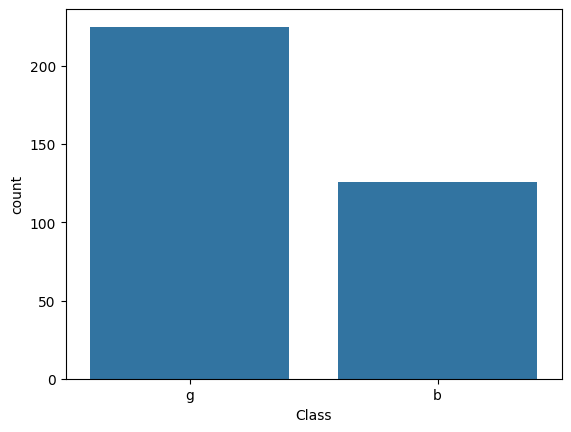

In [ ]:
sns.countplot(x='Class', data=y)

Решается задача бинарной классификации, данные не сбалансированы

In [ ]:
# преобразуем в тип int
y.Class = y.Class.map({'g': 1, 'b': 0}).astype(int)

<ipython-input-8-c962901c78b8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y.Class = y.Class.map({'g': 1, 'b': 0}).astype(int)


## Часть А.

In [ ]:
# Разбить выборку на обучающую и тестовую в соотношение 80%/20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

запуск с параметрами по умолчанию
 **C=1.0, kernel='rbf'**, degree=3, gamma='scale', coef0=0.0, shrinking=True, probability=False, tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=-1, decision_function_shape='ovr', break_ties=False, random_state=None)[source]




In [ ]:
svm = SVC()
svm.fit(X_train, y_train)

# Предсказание на обучающей и тестовой выборках
y_train_pred = svm.predict(X_train)
y_test_pred = svm.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
# Оцениваем число опорных векторов
num_support_vectors = np.sum(svm.n_support_)
print("Число опорных векторов:", num_support_vectors)

Число опорных векторов: 99


На тренировочной выборке

In [ ]:
# Рассчитать метрики качества
accuracy = accuracy_score(y_train, y_train_pred)
precision = precision_score(y_train, y_train_pred)
recall = recall_score(y_train, y_train_pred)
f1 = f1_score(y_train, y_train_pred)

print('На тренировочной выборке')
print("Общая точность: ", accuracy)
print("Recall: ", recall)
print("Precision:", precision)
print("F1-measure:", f1)

На тренировочной выборке
Общая точность:  0.9607142857142857
Recall:  0.9835164835164835
Precision: 0.9572192513368984
F1-measure: 0.970189701897019


На тестовой выборке:

In [ ]:
# Рассчитать метрики качества
accuracy = accuracy_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)

print('На тестовой выборке')
print("Общая точность: ", accuracy)
print("Recall: ", recall)
print("Precision:", precision)
print("F1-measure:", f1)

На тестовой выборке
Общая точность:  0.9295774647887324
Recall:  1.0
Precision: 0.8958333333333334
F1-measure: 0.945054945054945


Переберем по сетке ядра и значение коэффициента регуляризации С

In [ ]:
parameters = {'C':  [0.1, 1, 10, 100],
              'degree': [2, 3, 4, 5],
              'kernel': ['linear', 'sigmoid', 'poly', 'rbf']}

grid_search = GridSearchCV(SVC(), parameters, cv=5, scoring="f1")
grid_search.fit(X_train, y_train)

Вывод лучших параметров

In [ ]:
grid_search.best_params_

{'C': 1, 'degree': 2, 'kernel': 'rbf'}

**Лучшее ядро rbf, параметр регуляризации С = 1**

In [ ]:
grid_search.best_score_

0.9601252456306529

In [ ]:
best_model = grid_search.best_estimator_

### Визуализация с помощью t-sne и UMAP

С параметрами по умолчанию

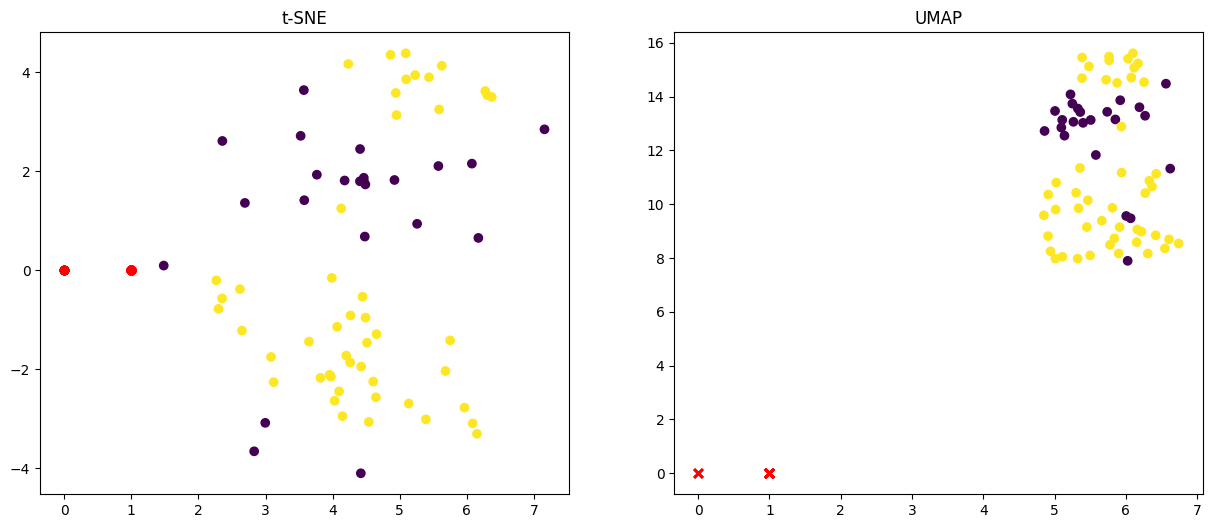

In [ ]:
support_vectors = best_model.support_vectors_

# Применение t-SNE
tsne = TSNE(n_components=2)
tsne_results = tsne.fit_transform(X_test)

# Применение UMAP
umap_result = umap.UMAP(n_components=2).fit_transform(X_test)

# Визуализация результатов
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
plt.scatter(tsne_results[:,0], tsne_results[:,1], c=best_model.predict(X_test))
plt.scatter(support_vectors[:,0], support_vectors[:,1], color='red', marker='x')
plt.title('t-SNE')

plt.subplot(1, 2, 2)
plt.scatter(umap_result[:, 0], umap_result[:, 1], c=best_model.predict(X_test))
plt.scatter(support_vectors[:,0], support_vectors[:,1], color='red', marker='x')
plt.title('UMAP')

plt.show()

Красным цветом на графике помечены опорные вектора

Поэкспериментируем с разными параметрами методов t-sne и UMAP

**t-sne**

In [ ]:
def draw_tsne(perplexity=30, early_exaggeration=12, n_components=2, title=''):
    tsne = TSNE(n_components=2, perplexity=perplexity, early_exaggeration=early_exaggeration)
    tsne_results = tsne.fit_transform(X_test)

    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.scatter(tsne_results[:,0], tsne_results[:,1], c=best_model.predict(X_test))
    ax.scatter(support_vectors[:,0], support_vectors[:,1], color='red', marker='x')
    plt.title(title, fontsize=18)

по параметру perplexity

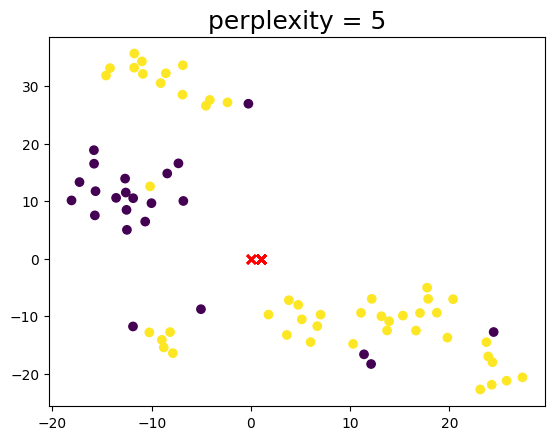

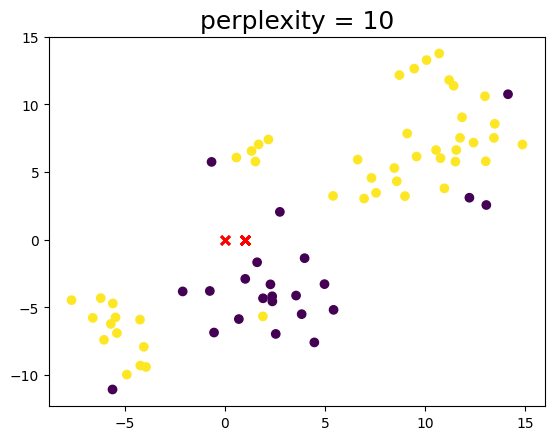

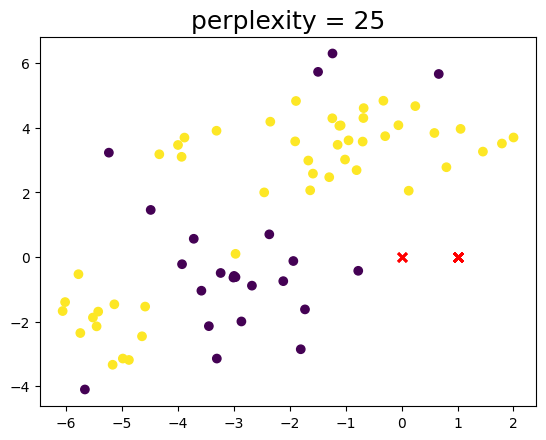

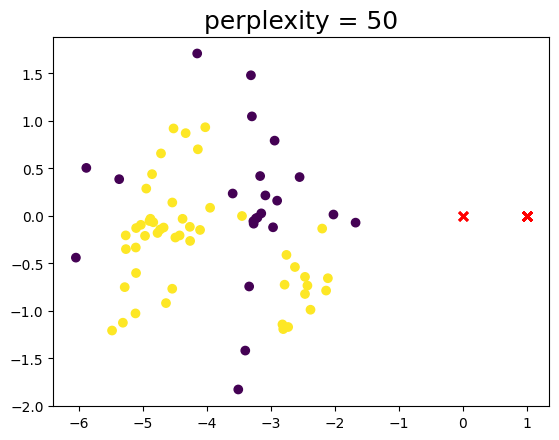

In [ ]:
for n in (5, 10, 25, 50):
    draw_tsne(perplexity=n, title='perplexity = {}'.format(n))

по параметру  early_exaggeration

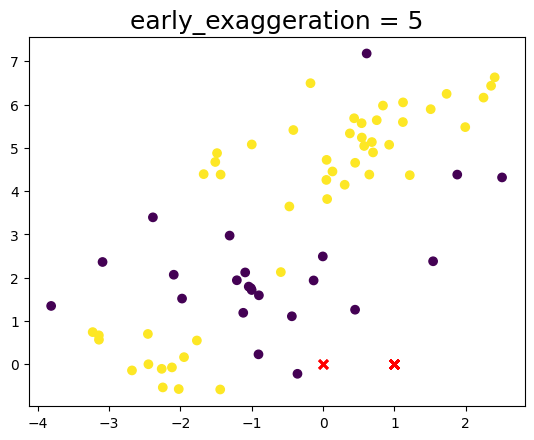

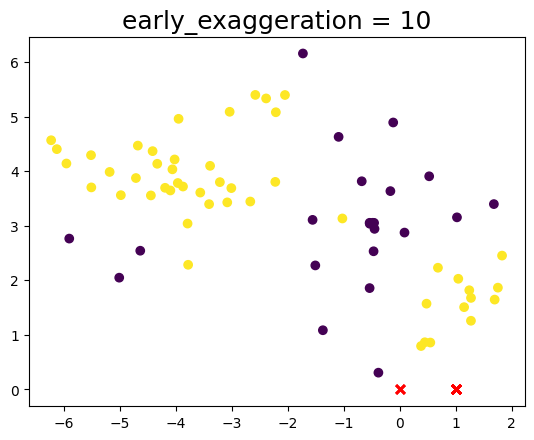

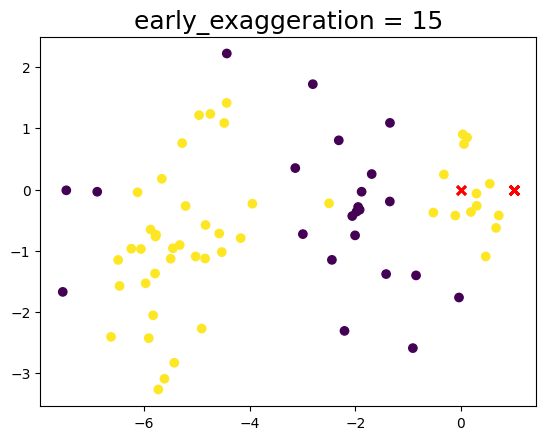

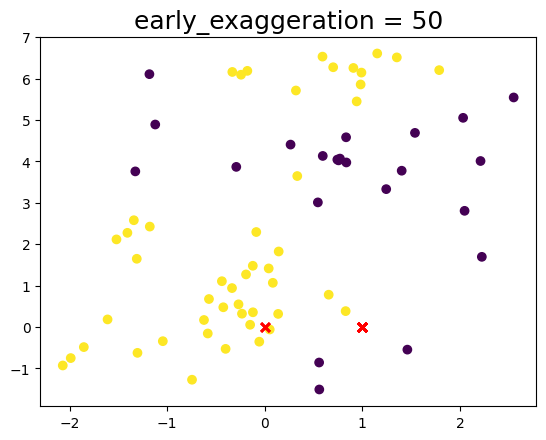

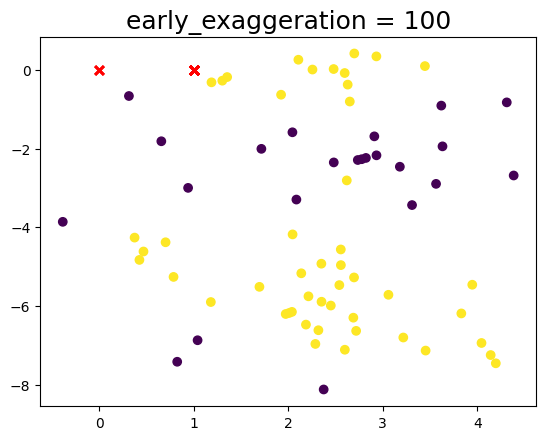

In [ ]:
for n in (5, 10, 15, 50, 100):
    draw_tsne(early_exaggeration=n, title='early_exaggeration = {}'.format(n))

**umap**

In [ ]:
def draw_umap(n_neighbors=15, min_dist=0.1, n_components=2, metric='euclidean', title=''):
    fit = umap.UMAP(
        n_neighbors=n_neighbors,
        min_dist=min_dist,
        n_components=n_components,
        metric=metric
    )
    u = fit.fit_transform(X_test)
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.scatter(u[:,0], u[:,1], c=best_model.predict(X_test))
    ax.scatter(support_vectors[:,0], support_vectors[:,1], color='red', marker='x')
    plt.title(title, fontsize=18)

по параметру n_neighbors

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:2433: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


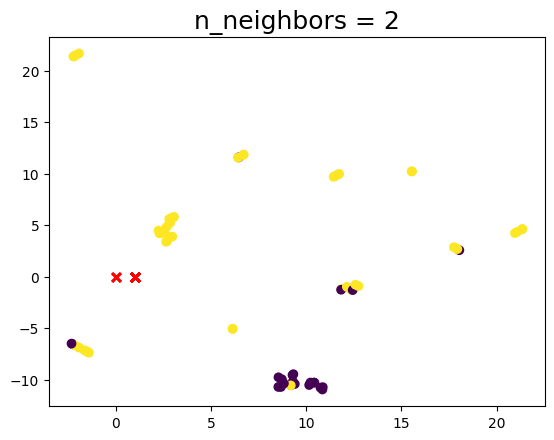

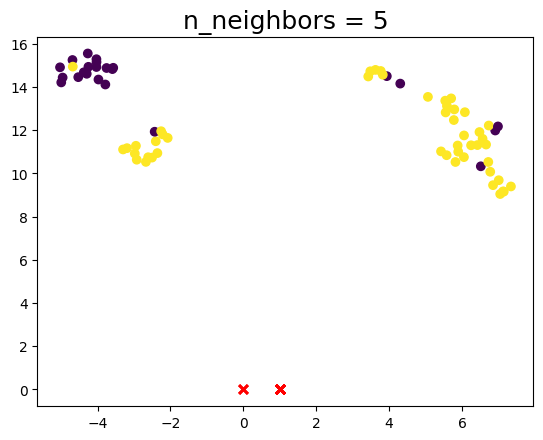

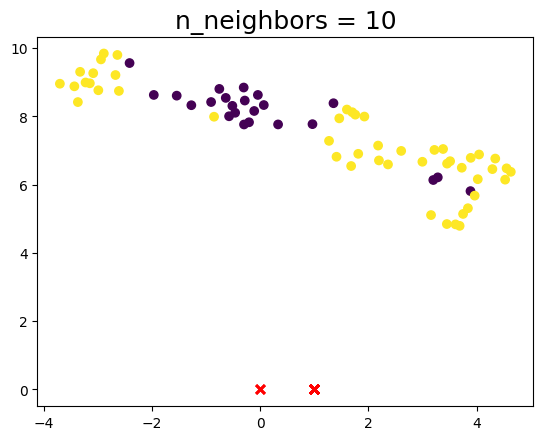

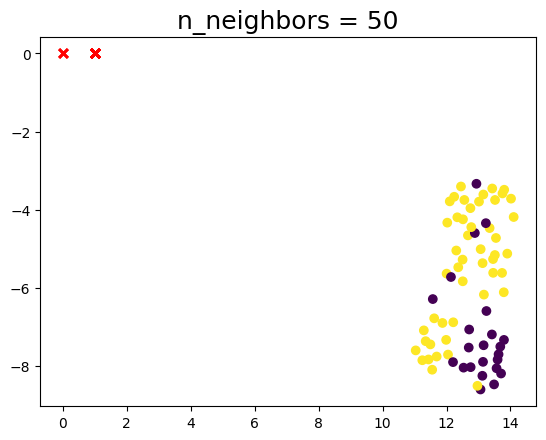

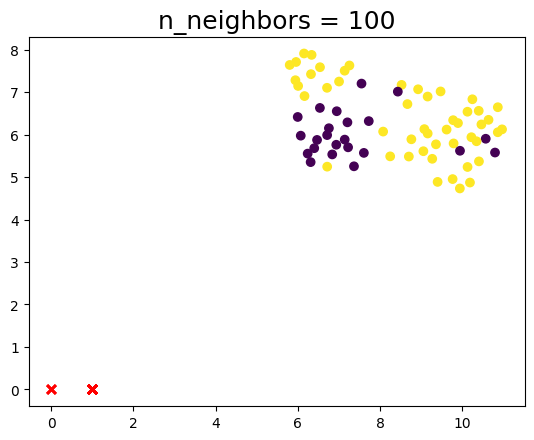

In [ ]:
for n in (2, 5, 10, 50, 100):
    draw_umap(n_neighbors=n, title='n_neighbors = {}'.format(n))

При значении n_neighbors=2 мы видим, что UMAP просто склеивает небольшие цепочки, но из-за узкого/локального взгляда не может увидеть, как они соединяются друг с другом. Он также оставляет много разных компонентов (и даже одноэлементных точек). Это отражает тот факт, что с точки зрения мелких деталей данные очень разрозненны и разбросаны по пространству.

По мере увеличения n_neighbors  UMAP удается видеть больше общей структуры данных, объединяя больше компонентов и лучше охватывая более широкую структуру данных. На этапе n_neighbors=50 у нас есть довольно хорошее общее представление о данных, показывающее, как различные цвета взаимодействуют друг с другом во всем наборе данных.

По мере дальнейшего увеличения n_neighbors все больше и больше внимания уделяется общей структуре данных.

по параметру min_dist

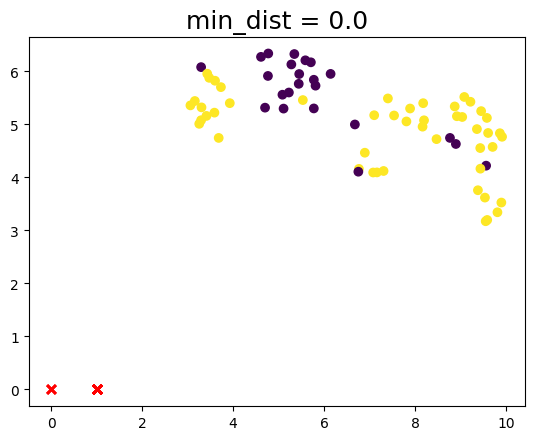

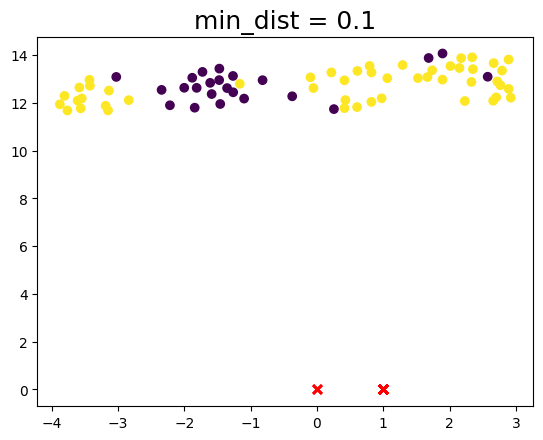

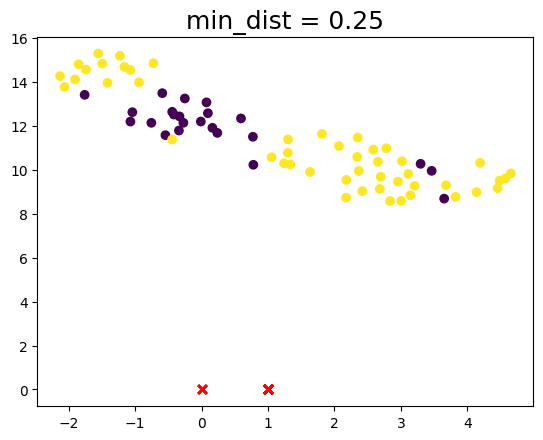

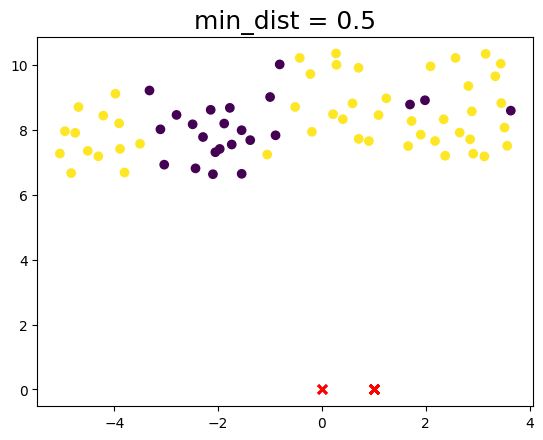

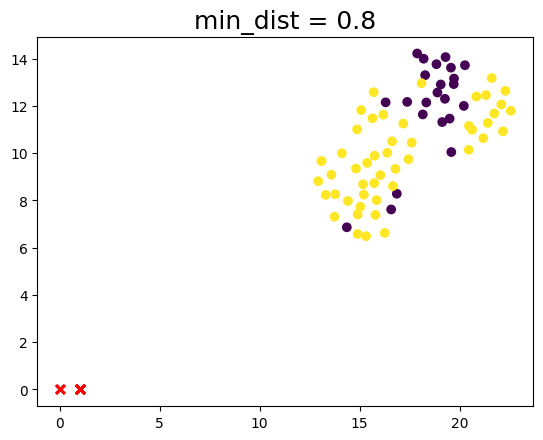

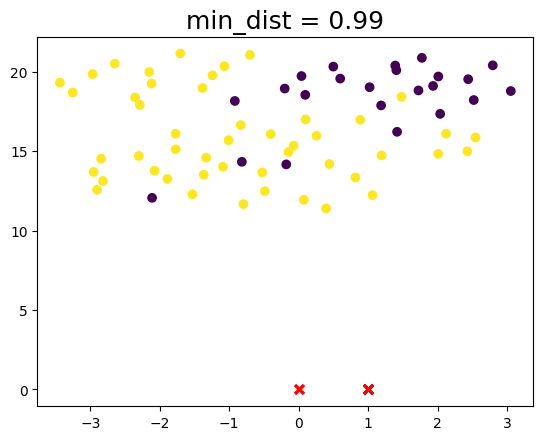

In [ ]:
for d in (0.0, 0.1, 0.25, 0.5, 0.8, 0.99):
    draw_umap(min_dist=d, title='min_dist = {}'.format(d))

с помощью min_dist=0.0 UMAP удается находить в данных небольшие связные компоненты. По мере увеличения min_dist  эти структуры раздвигаются на более мягкие и общие характеристики.

Рисунки разбиения на классы на основе выборок с известными
метками классов и рисунки разбиения на классы с метками выставленными
классификатором:

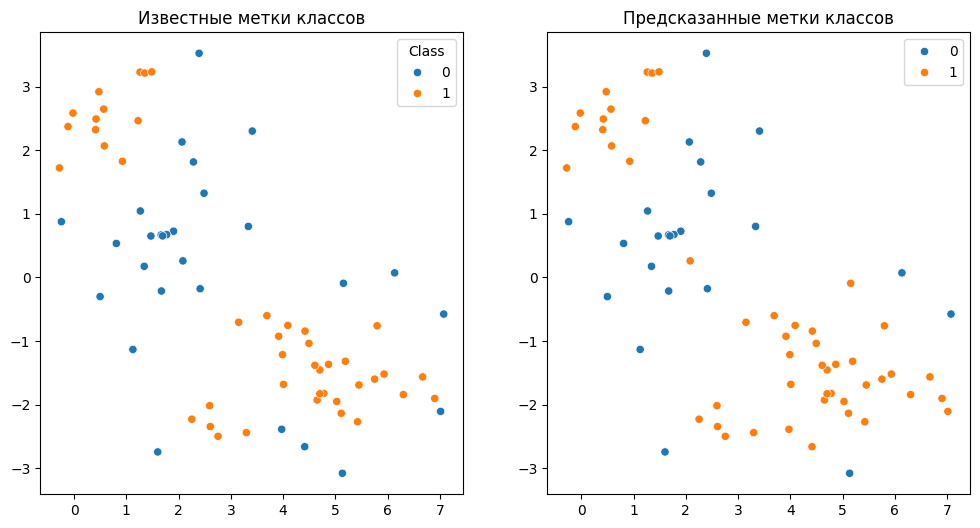

In [ ]:
# Визуализация с помощью t-SNE
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_test)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=y_test.Class, legend='full')
plt.title('Известные метки классов')

plt.subplot(1, 2, 2)
sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=best_model.predict(X_test), legend='full')
plt.title('Предсказанные метки классов')

plt.show()

На графике выше видно, что в предсказанных значениях есть ошибки

## Часть B

In [ ]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

# Предсказание на обучающей и тестовой выборках
y_train_pred = knn.predict(X_train)
y_test_pred = knn.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


На тренировочной выборке

In [ ]:
# Рассчитать метрики качества
accuracy = accuracy_score(y_train, y_train_pred)
precision = precision_score(y_train, y_train_pred)
recall = recall_score(y_train, y_train_pred)
f1 = f1_score(y_train, y_train_pred)

print('На тренировочной выборке')
print("Общая точность: ", accuracy)
print("Recall: ", recall)
print("Precision:", precision)
print("F1-measure:", f1)

На тренировочной выборке
Общая точность:  0.8714285714285714
Recall:  0.9835164835164835
Precision: 0.8443396226415094
F1-measure: 0.9086294416243655


На тестовой выборке:

In [ ]:
# Рассчитать метрики качества
accuracy = accuracy_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)

print('На тестовой выборке')
print("Общая точность: ", accuracy)
print("Recall: ", recall)
print("Precision:", precision)
print("F1-measure:", f1)

На тестовой выборке
Общая точность:  0.8450704225352113
Recall:  1.0
Precision: 0.7962962962962963
F1-measure: 0.8865979381443299


Переберем по сетке различное число ближайших соседей, различные метрики
для вычисления расстояний между объектами, различные правила
голосования.

In [ ]:
parameters = {
    'n_neighbors': np.arange(3, 20, 2),
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}

grid_search = GridSearchCV(KNeighborsClassifier(), parameters, cv=5, scoring="f1")
grid_search.fit(X_train, y_train)

Вывод лучших параметров

In [ ]:
grid_search.best_params_

{'algorithm': 'auto', 'n_neighbors': 3, 'weights': 'uniform'}

**Лучшими параметрами являются:**

Число соседей: 3

Метрика для вычисления расстояния: uniform

Алгоритм: auto (попытается выбрать наиболее подходящий алгоритм на основе значений, переданных в метод fit)

In [ ]:
grid_search.best_score_

0.8906118143459916

In [ ]:
best_model = grid_search.best_estimator_

### Визуализация с помощью t-sne и UMAP

Поэкспериментируем с разными параметрами методов t-sne и UMAP

**t-sne**

In [ ]:
def draw_tsne(perplexity=30, early_exaggeration=12, n_components=2, title=''):
    tsne = TSNE(n_components=2, perplexity=perplexity, early_exaggeration=early_exaggeration)
    tsne_results = tsne.fit_transform(X_test)

    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.scatter(tsne_results[:,0], tsne_results[:,1], c=best_model.predict(X_test))
    plt.title(title, fontsize=18)

по параметру perplexity

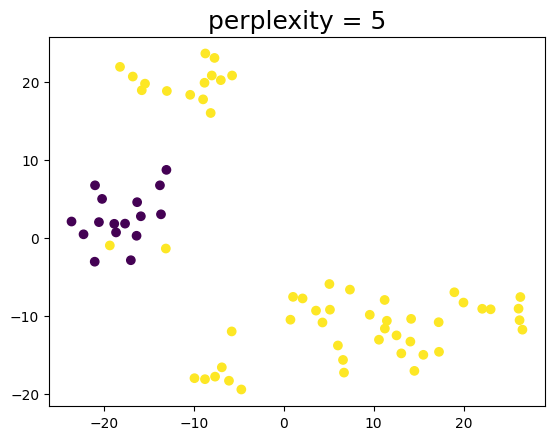

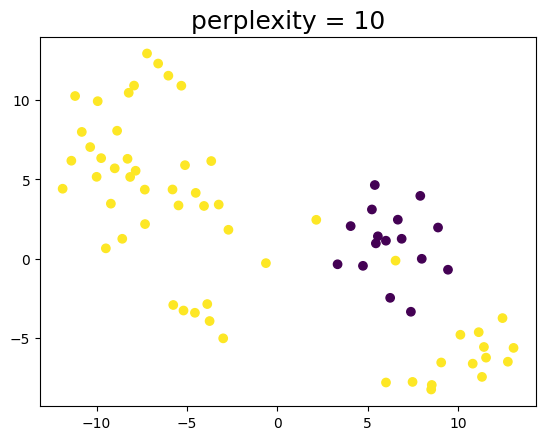

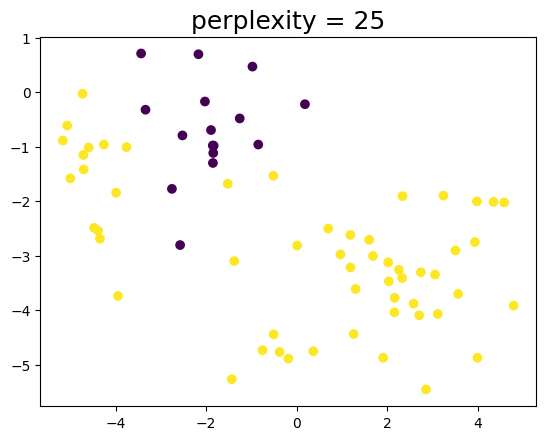

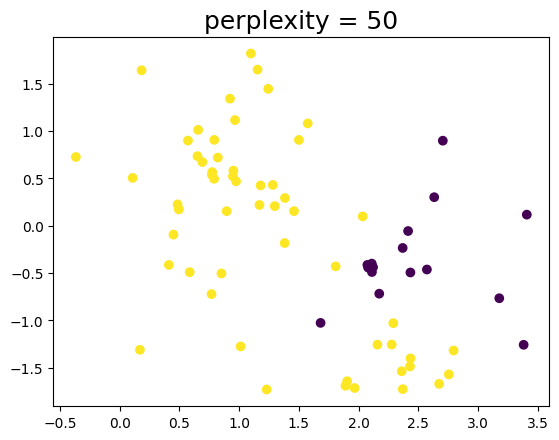

In [ ]:
for n in (5, 10, 25, 50):
    draw_tsne(perplexity=n, title='perplexity = {}'.format(n))

по параметру  early_exaggeration

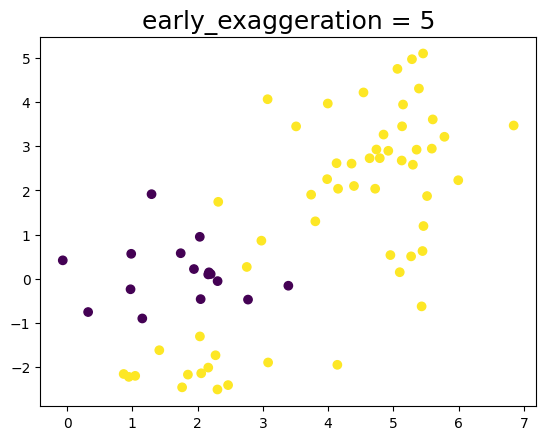

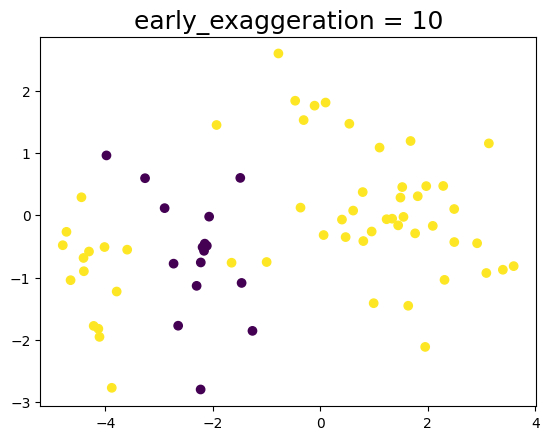

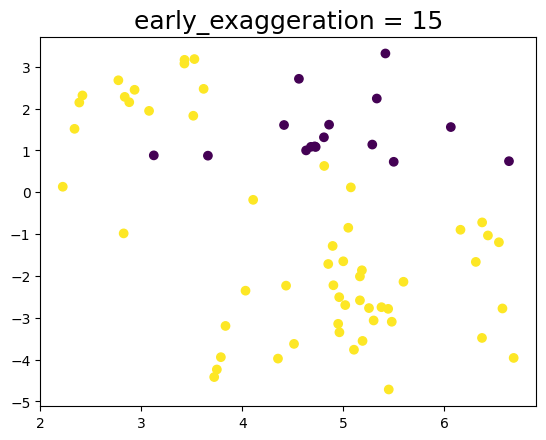

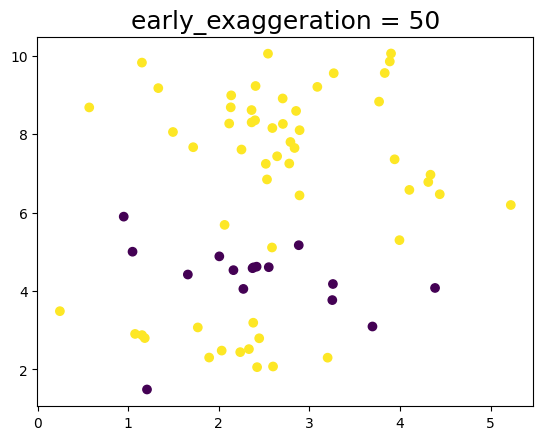

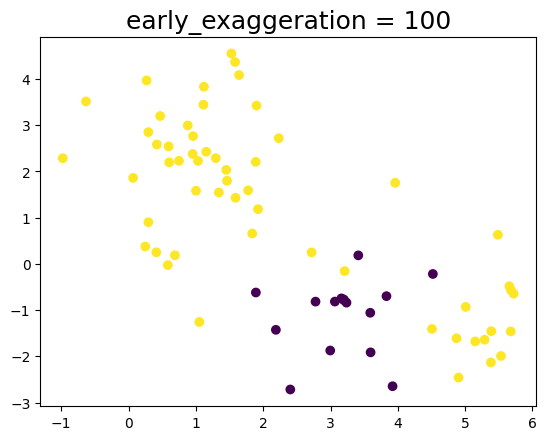

In [ ]:
for n in (5, 10, 15, 50, 100):
    draw_tsne(early_exaggeration=n, title='early_exaggeration = {}'.format(n))

**umap**

In [ ]:
def draw_umap(n_neighbors=15, min_dist=0.1, n_components=2, metric='euclidean', title=''):
    fit = umap.UMAP(
        n_neighbors=n_neighbors,
        min_dist=min_dist,
        n_components=n_components,
        metric=metric
    )
    u = fit.fit_transform(X_test)
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.scatter(u[:,0], u[:,1], c=best_model.predict(X_test))
    plt.title(title, fontsize=18)

по параметру n_neighbors

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:2433: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


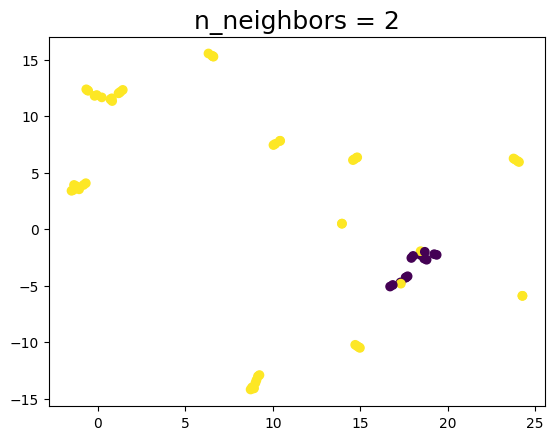

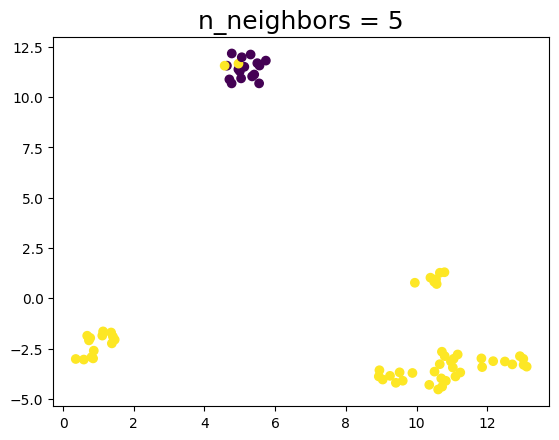

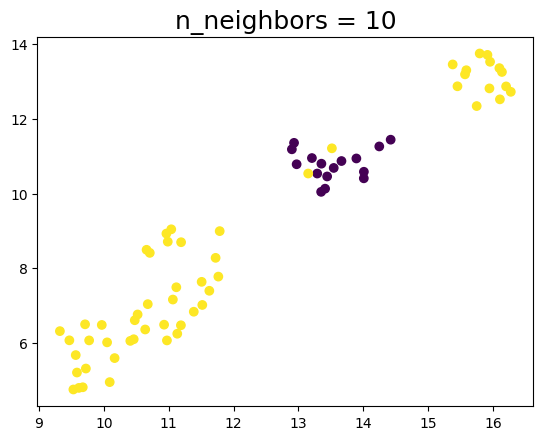

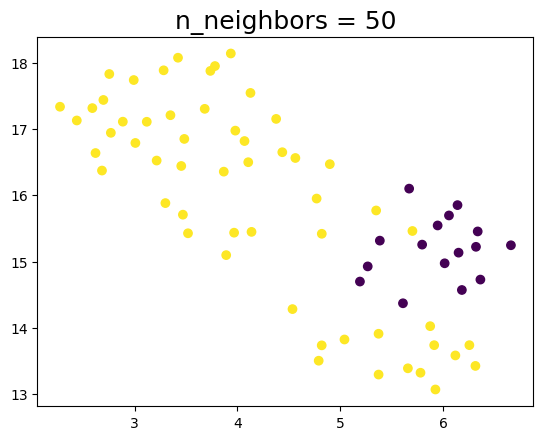

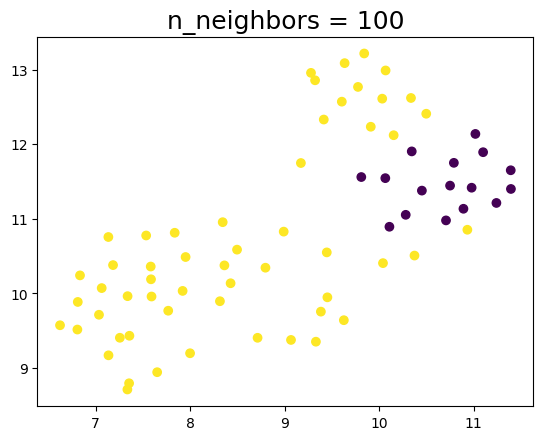

In [ ]:
for n in (2, 5, 10, 50, 100):
    draw_umap(n_neighbors=n, title='n_neighbors = {}'.format(n))

по параметру min_dist

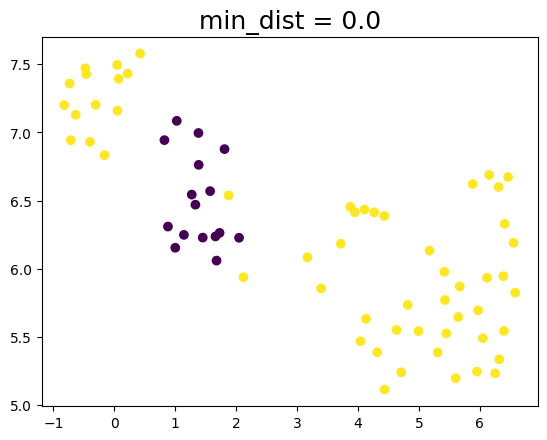

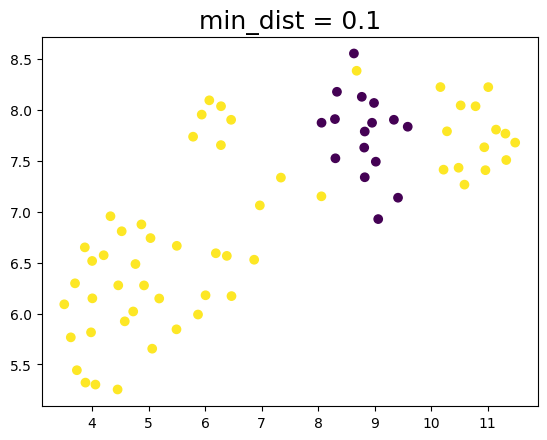

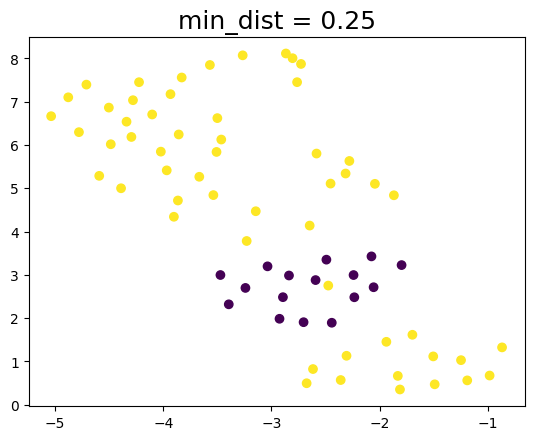

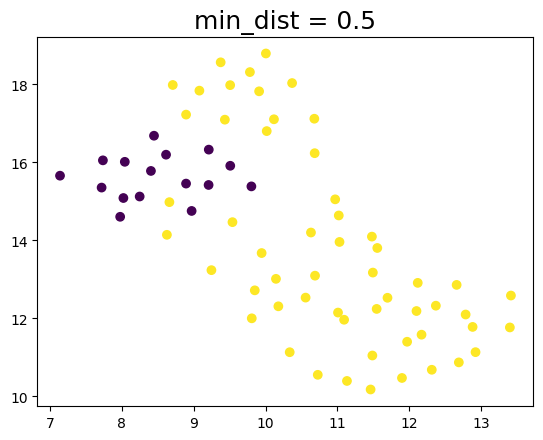

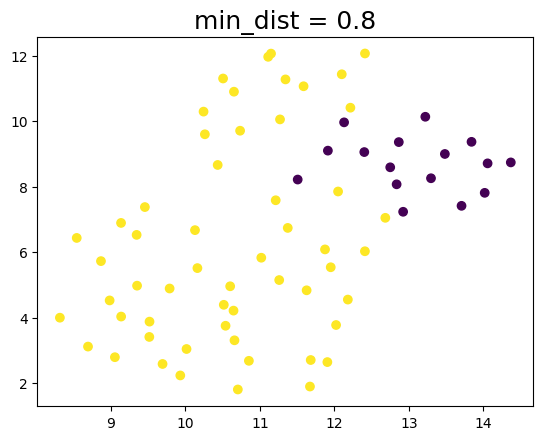

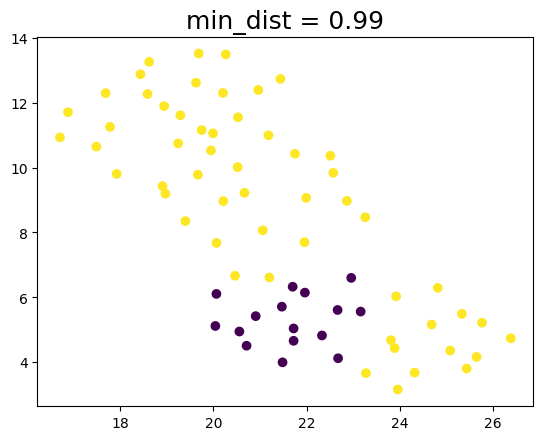

In [ ]:
for d in (0.0, 0.1, 0.25, 0.5, 0.8, 0.99):
    draw_umap(min_dist=d, title='min_dist = {}'.format(d))

Рисунки разбиения на классы на основе выборок с известными
метками классов и рисунки разбиения на классы с метками выставленными
классификатором:

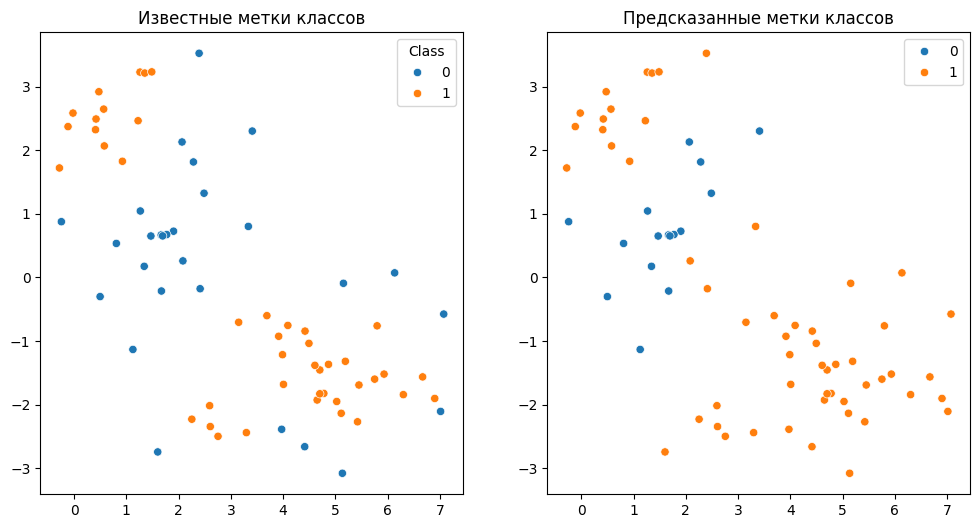

In [ ]:
# Визуализация с помощью t-SNE
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_test)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=y_test.Class, legend='full')
plt.title('Известные метки классов')

plt.subplot(1, 2, 2)
sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=best_model.predict(X_test), legend='full')
plt.title('Предсказанные метки классов')

plt.show()

Как и SVM метод KNN ошибается в некоторых точках.

## Часть С

In [ ]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

# Предсказание на обучающей и тестовой выборках
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

<ipython-input-65-13e6e9960f45>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, y_train)


На тренировочной выборке

In [ ]:
# Рассчитать метрики качества
accuracy = accuracy_score(y_train, y_train_pred)
precision = precision_score(y_train, y_train_pred)
recall = recall_score(y_train, y_train_pred)
f1 = f1_score(y_train, y_train_pred)

print('На тренировочной выборке')
print("Общая точность: ", accuracy)
print("Recall: ", recall)
print("Precision:", precision)
print("F1-measure:", f1)

На тренировочной выборке
Общая точность:  1.0
Recall:  1.0
Precision: 1.0
F1-measure: 1.0


На тестовой выборке:

In [ ]:
# Рассчитать метрики качества
accuracy = accuracy_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)

print('На тестовой выборке')
print("Общая точность: ", accuracy)
print("Recall: ", recall)
print("Precision:", precision)
print("F1-measure:", f1)

На тестовой выборке
Общая точность:  0.9295774647887324
Recall:  0.9767441860465116
Precision: 0.9130434782608695
F1-measure: 0.9438202247191011


Переберем по сетке различное число estimators (решающих деревьев), максимальную глубину дерева и функцию для измерения качества разделения

In [ ]:
parameters= {
      'n_estimators': [10, 25, 50, 100],
      'criterion': ['gini', 'entropy'],
      'max_depth': [3, 5, 8, 10, 15, 20, 25]
}

grid_search = GridSearchCV(RandomForestClassifier(), parameters, cv=5, scoring="f1")
grid_search.fit(X_train, y_train)

Вывод лучших параметров

In [ ]:
grid_search.best_params_

{'criterion': 'gini', 'max_depth': 3, 'n_estimators': 50}

**Лучшими параметрами являются:**

Маскимальная глубина дерева: 3

Функция для измерения качества разделения: gini

Количество деревьев в лесу: 50

In [ ]:
grid_search.best_score_

0.9603912657596869

In [ ]:
best_model = grid_search.best_estimator_

### Визуализация с помощью t-sne и UMAP

Поэкспериментируем с разными параметрами методов t-sne и UMAP

**t-sne**

In [ ]:
def draw_tsne(perplexity=30, early_exaggeration=12, n_components=2, title=''):
    tsne = TSNE(n_components=2, perplexity=perplexity, early_exaggeration=early_exaggeration)
    tsne_results = tsne.fit_transform(X_test)

    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.scatter(tsne_results[:,0], tsne_results[:,1], c=best_model.predict(X_test))
    plt.title(title, fontsize=18)

по параметру perplexity

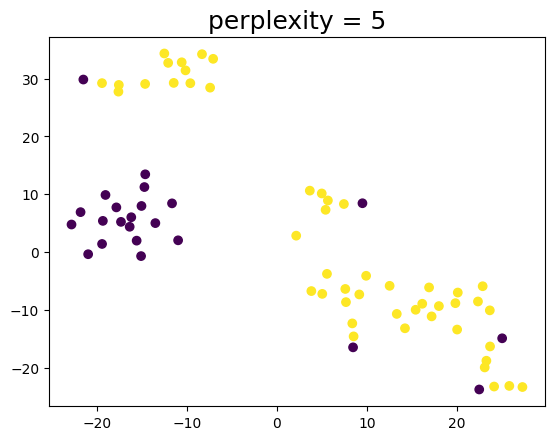

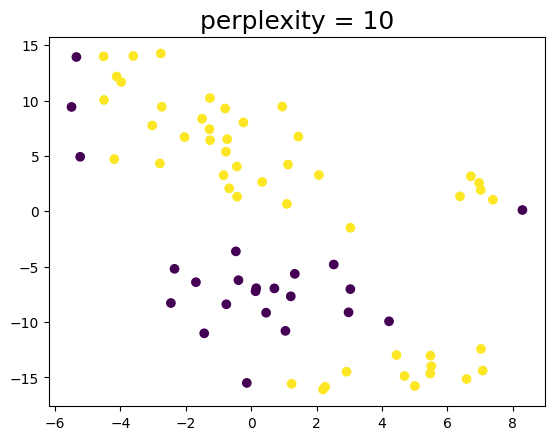

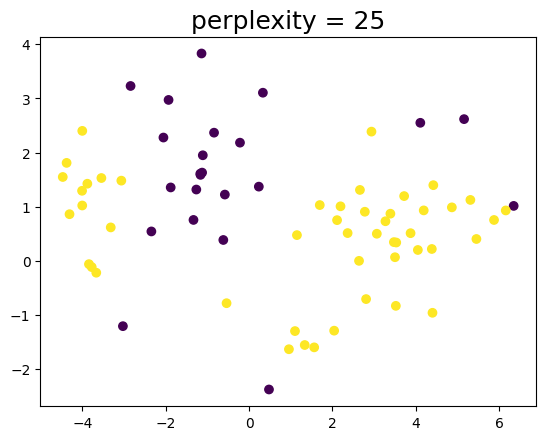

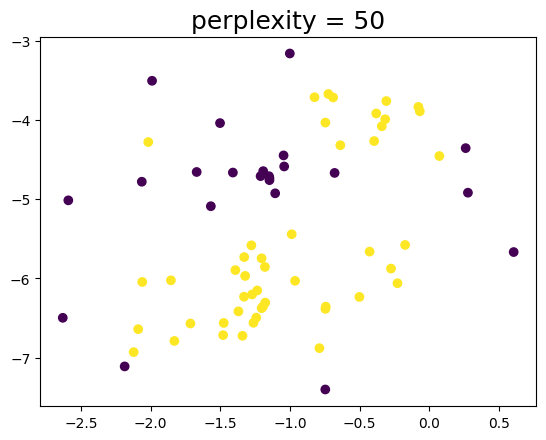

In [ ]:
for n in (5, 10, 25, 50):
    draw_tsne(perplexity=n, title='perplexity = {}'.format(n))

по параметру  early_exaggeration

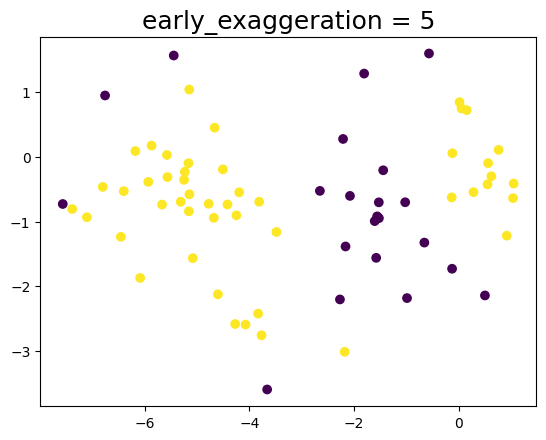

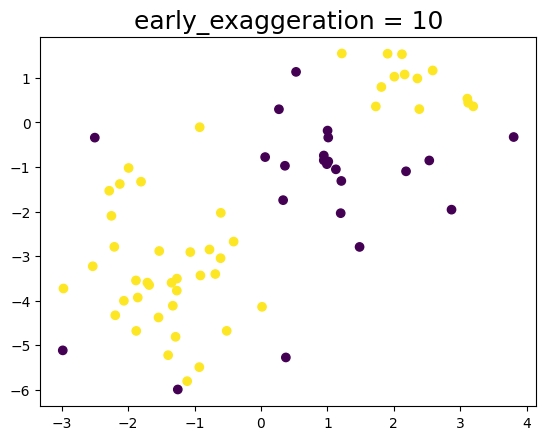

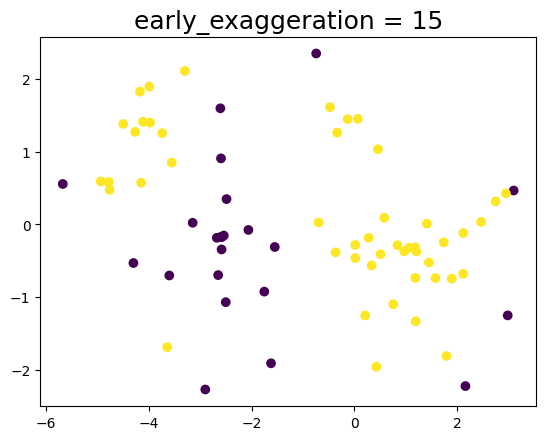

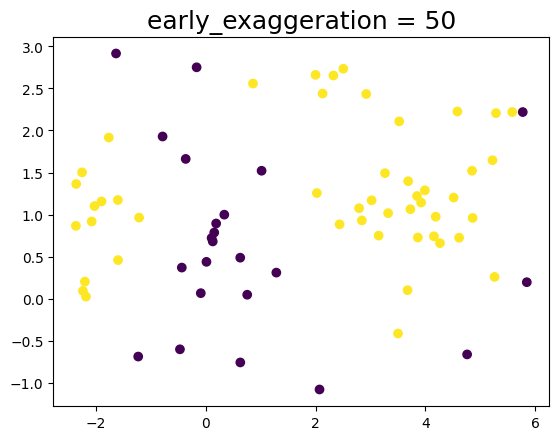

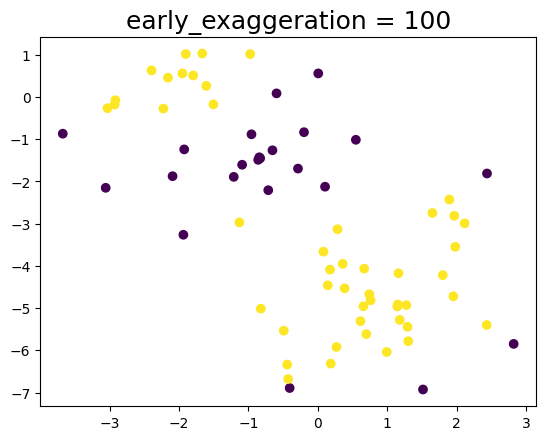

In [ ]:
for n in (5, 10, 15, 50, 100):
    draw_tsne(early_exaggeration=n, title='early_exaggeration = {}'.format(n))

**umap**

In [ ]:
def draw_umap(n_neighbors=15, min_dist=0.1, n_components=2, metric='euclidean', title=''):
    fit = umap.UMAP(
        n_neighbors=n_neighbors,
        min_dist=min_dist,
        n_components=n_components,
        metric=metric
    )
    u = fit.fit_transform(X_test)
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.scatter(u[:,0], u[:,1], c=best_model.predict(X_test))
    plt.title(title, fontsize=18)

по параметру n_neighbors

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:2433: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


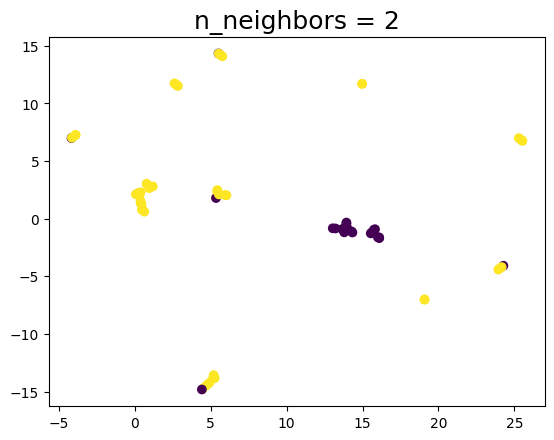

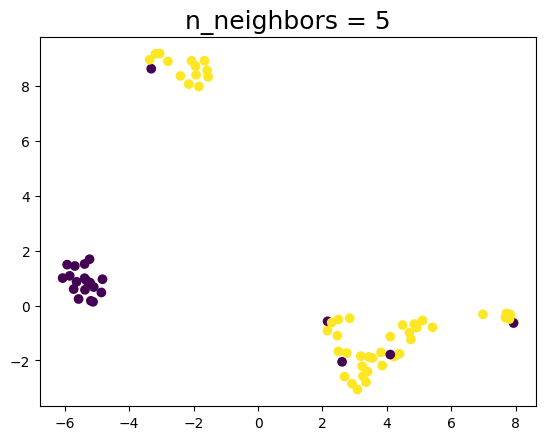

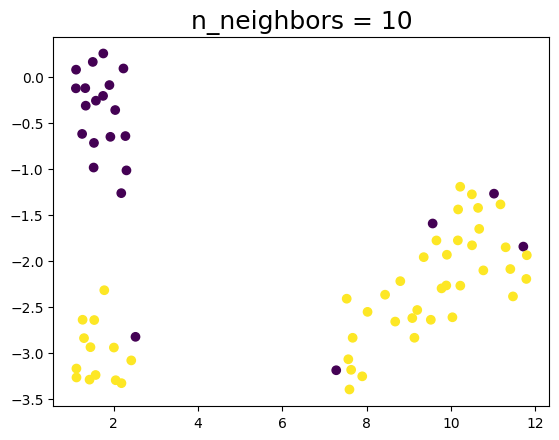

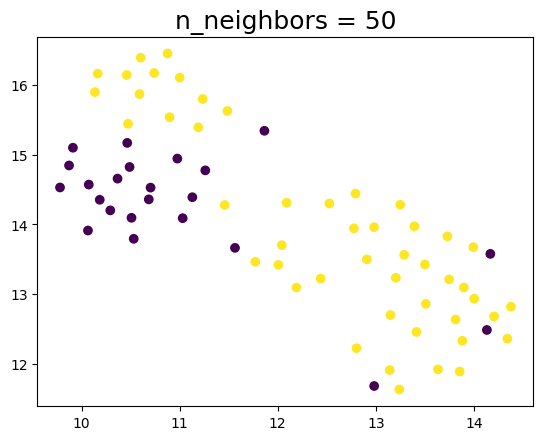

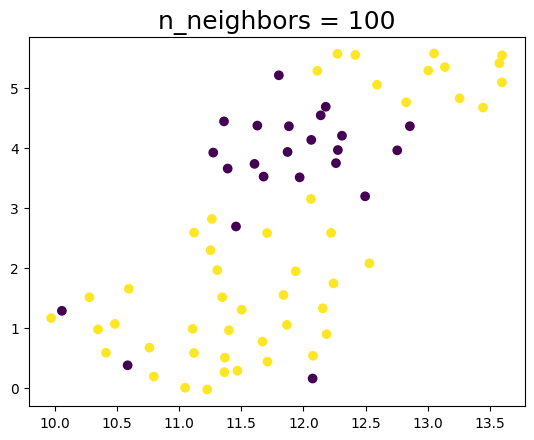

In [ ]:
for n in (2, 5, 10, 50, 100):
    draw_umap(n_neighbors=n, title='n_neighbors = {}'.format(n))

по параметру min_dist

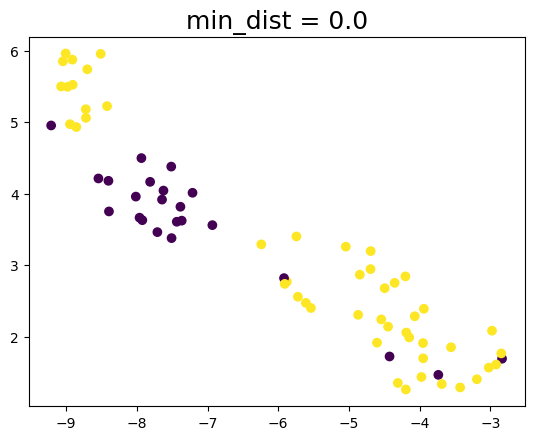

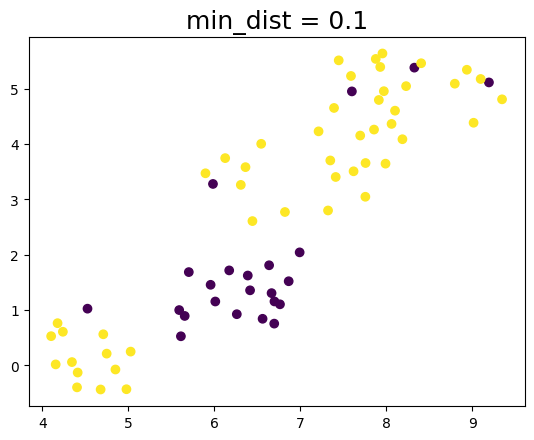

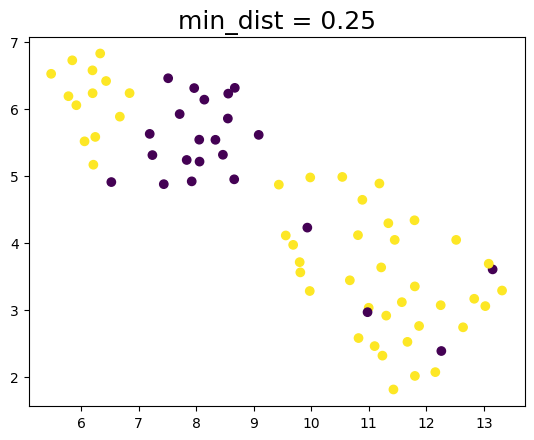

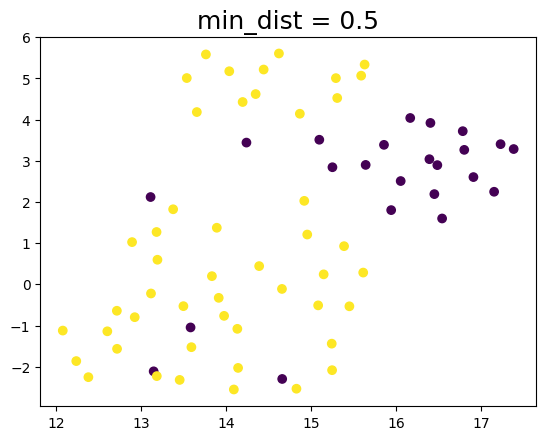

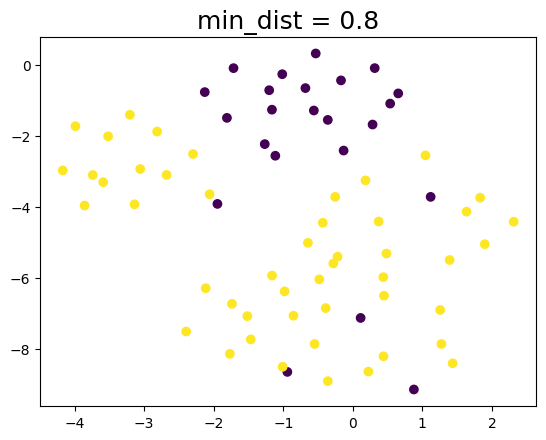

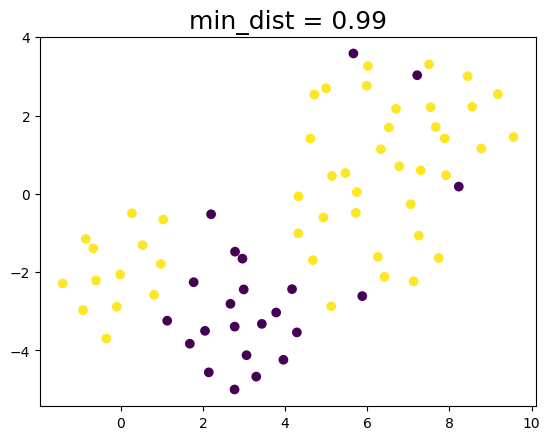

In [ ]:
for d in (0.0, 0.1, 0.25, 0.5, 0.8, 0.99):
    draw_umap(min_dist=d, title='min_dist = {}'.format(d))

Рисунки разбиения на классы на основе выборок с известными
метками классов и рисунки разбиения на классы с метками выставленными
классификатором:

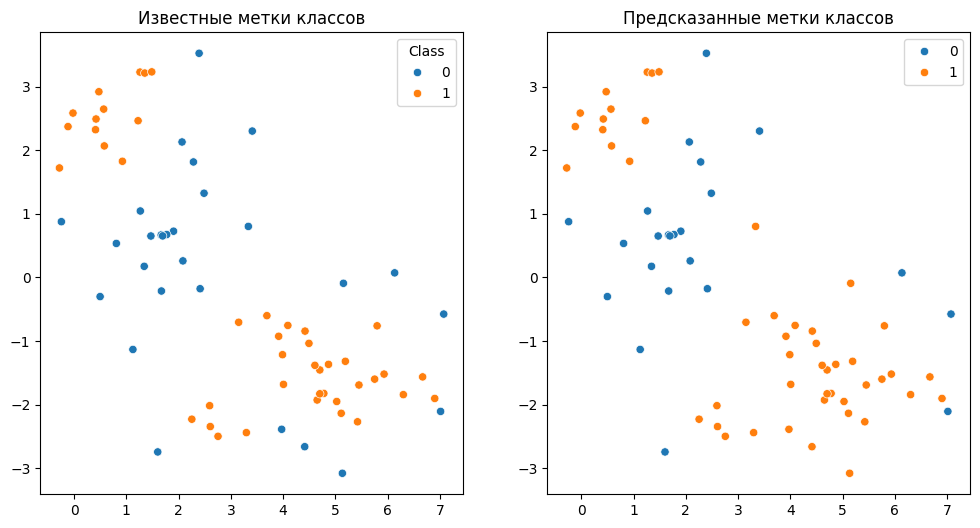

In [ ]:
# Визуализация с помощью t-SNE
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_test)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=y_test.Class, legend='full')
plt.title('Известные метки классов')

plt.subplot(1, 2, 2)
sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=best_model.predict(X_test), legend='full')
plt.title('Предсказанные метки классов')

plt.show()

RandomForest также справился не со 100% точностью, есть ошибки. Есть точки, в которых все три классификатора ошиблись. Возможно это выбросы в исходных данных.